In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ab\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
df = pd.read_csv('snap_inc_comments.csv', encoding='cp1252')
df.head()
type(df['comments'][0])

str

In [10]:
df.comments

0                                                    No
1                                                  None
2                                              it sucks
3                                                    no
4                                                  Nope
5     Too many ads, way too one sided. Everything is...
6                                                    No
7            It’s not as useful as the other platforms.
8     It has gotten more boring and dully repetitive...
9                                                  nope
10                            i dont use snap chat lmao
11                                 Time killing Apps #1
12                      snapchat is so creepy to me idk
13                                                  NaN
14    Instagram is becoming the new Snapchat. I only...
15                                       I don’t use it
16    Before it was better now i dont like it too mu...
17    Instagram does everything so I stopped usi

In [4]:
#combine description values into one string
full_text = df['comments'].str.cat(sep=" ")
#remove stop words
stop_words = set(stopwords.words('english'))
stop_words.update(['RT', 'https', '\'', 'de', 'la','co', 't', 'c', 'o', 'covid 19\'', 'COVID', 'COVID 19', 'COVID 19\'', '19\'', 'coronavirus', 'coronavirus\'', 't co'])
#turn string into list of words
word_tokens = word_tokenize(full_text)  
#filter out stop words
filtered_sentence = [w for w in word_tokens if not w in stop_words]  
  
filtered_sentence = []  
  
for w in word_tokens:  
    if w not in stop_words:  
        filtered_sentence.append(w)

In [5]:
print(filtered_sentence[0:10])
#combine sentence into string with type string
' '.join(filtered_sentence)
filtered_sentence = str(filtered_sentence)
type(filtered_sentence)

['No', 'None', 'sucks', 'Nope', 'Too', 'many', 'ads', ',', 'way', 'one']


str

In [6]:
filtered_sentence = filtered_sentence.replace("'", "")
filtered_sentence = filtered_sentence.replace("Snapchat", "")
filtered_sentence = filtered_sentence.replace("snapchat", "")
filtered_sentence = filtered_sentence.replace("nt", "")
filtered_sentence = filtered_sentence.replace("gay", "")
filtered_sentence = filtered_sentence.replace("coact", "")
filtered_sentence = filtered_sentence.replace("shit", "")

<Figure size 432x288 with 0 Axes>

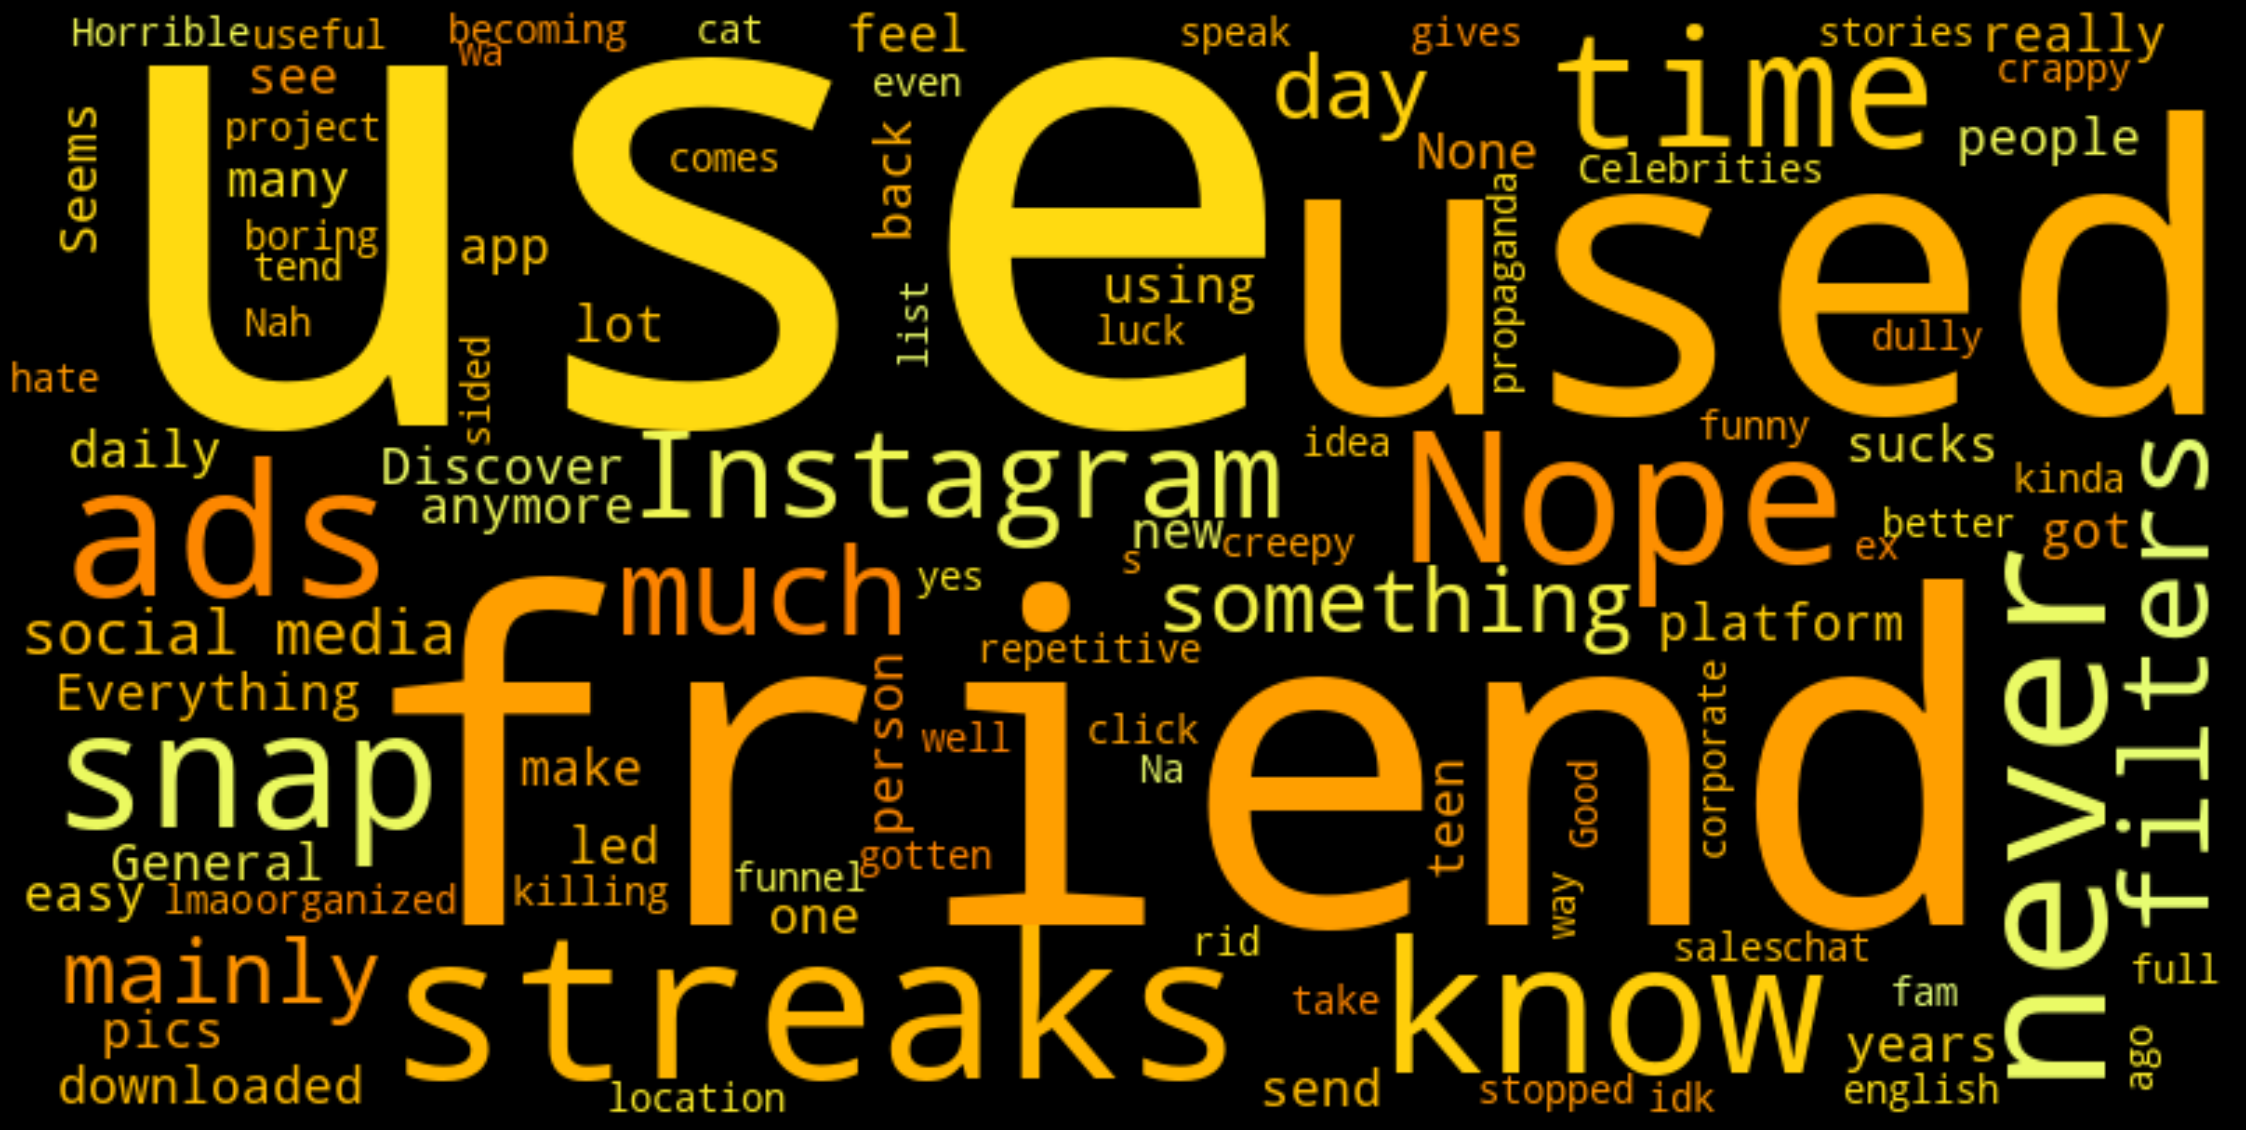

In [7]:
text = filtered_sentence

wordcloud = WordCloud(width = 800, height = 400, max_words=100, background_color="black",colormap="Wistia").generate(text)
plt.tight_layout(pad=0)
plt.figure(figsize=(40,22), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('snap_wordcloud.png', bbox_inches='tight')
plt.show()